In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.ndimage import gaussian_filter1d
import sys
sys.path.append('..')
from utils import ml_parameters
from utils import settings as s
from utils.helper_functions import get_frequency_data, to_angular_freq

c:\Users\bt8891\AppData\Local\miniconda3\envs\drift\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.5 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
feat_AUS = pd.read_pickle('../data/[feature_data]/AUS/feature_data_AUS.pkl')
feat_AUS_test = pd.read_pickle('../data/[feature_data]/AUS/feature_data_AUS_test.pkl')

feat_AUS.index = pd.to_datetime(feat_AUS.index)#
feat_AUS = feat_AUS.resample('5min').mean()
feat_AUS.index = pd.to_datetime(feat_AUS.index).tz_localize('Australia/Queensland')

FileNotFoundError: [Errno 2] No such file or directory: '../data/[feature_data]/AUS/feature_data_AUS_test.pkl'

In [ ]:
freq_AUS = pd.read_pickle('../data/Mainland_AUS_frequency_data_2021-2024.pkl')

In [ ]:
test_feat = feat_AUS.copy()
test_freq = pd.DataFrame({'Frequency': freq_AUS.copy()})
test_feat.index
test_freq = test_freq.loc['2023-02-12 00:05:00+10:00':]
# # test_feat.index#test_freq.index
test_join = test_feat.join(test_freq)
feat_AUS
freq_AUS.loc['2023-02-12':'2024-03-24']

2023-02-12 00:00:00+10:00    50.031
2023-02-12 00:00:04+10:00    50.016
2023-02-12 00:00:08+10:00    50.012
2023-02-12 00:00:12+10:00    50.026
2023-02-12 00:00:16+10:00     50.03
                              ...  
2024-03-24 23:59:40+10:00    50.021
2024-03-24 23:59:44+10:00    50.012
2024-03-24 23:59:48+10:00    50.018
2024-03-24 23:59:52+10:00    50.025
2024-03-24 23:59:56+10:00    50.017
Length: 8791200, dtype: object

In [36]:
gaussian_filter1d(freq_AUS.values.astype(float), sigma=60)

array([50.00723971, 50.00723992, 50.00724024, ..., 49.99638358,
       49.99638154, 49.99638055])

In [35]:
freq_AUS.values.astype(float)

array([50.02199936, 50.00899887, 50.00699997, ..., 49.976     ,
       49.985     , 49.977     ])

In [18]:
feat_input_actual = pd.read_hdf('../data/[feature_data]/AUS/input_actual.h5')

In [19]:
freq = pd.read_pickle('../data/Mainland_AUS_frequency_data_2021-2024.pkl')

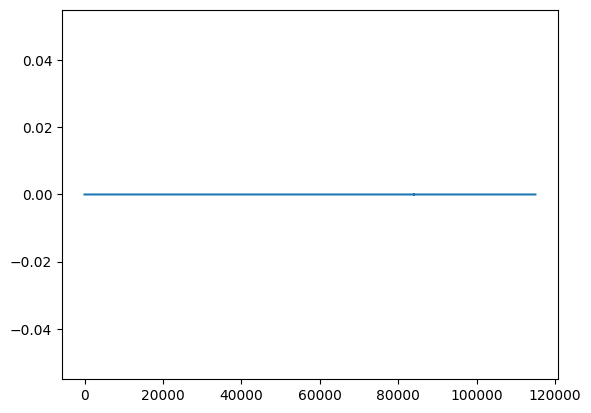

In [20]:
plt.plot(feat_AUS['Wind'].values - feat_input_actual['Wind_gen'].values)

In [6]:
feat_input_actual = pd.read_pickle('../data/[feature_data]/AUS/input_actual.pkl')

In [369]:
feat_nemosis = feat_input_actual.loc['2023-02-12 00:05:00+10:00':'2024-03-24 00:00:00+10:00']#['MWFLOW']

In [366]:
feat_AUS.shape,feat_nemosis.shape
(feat_AUS.iloc[20000:]==0).sum(axis=0)
(feat_nemosis['ROOFTOP_PV_ACTUAL'].iloc[20000:]==0).sum(axis=0)

np.int64(42164)

<Axes: xlabel='SETTLEMENTDATE'>

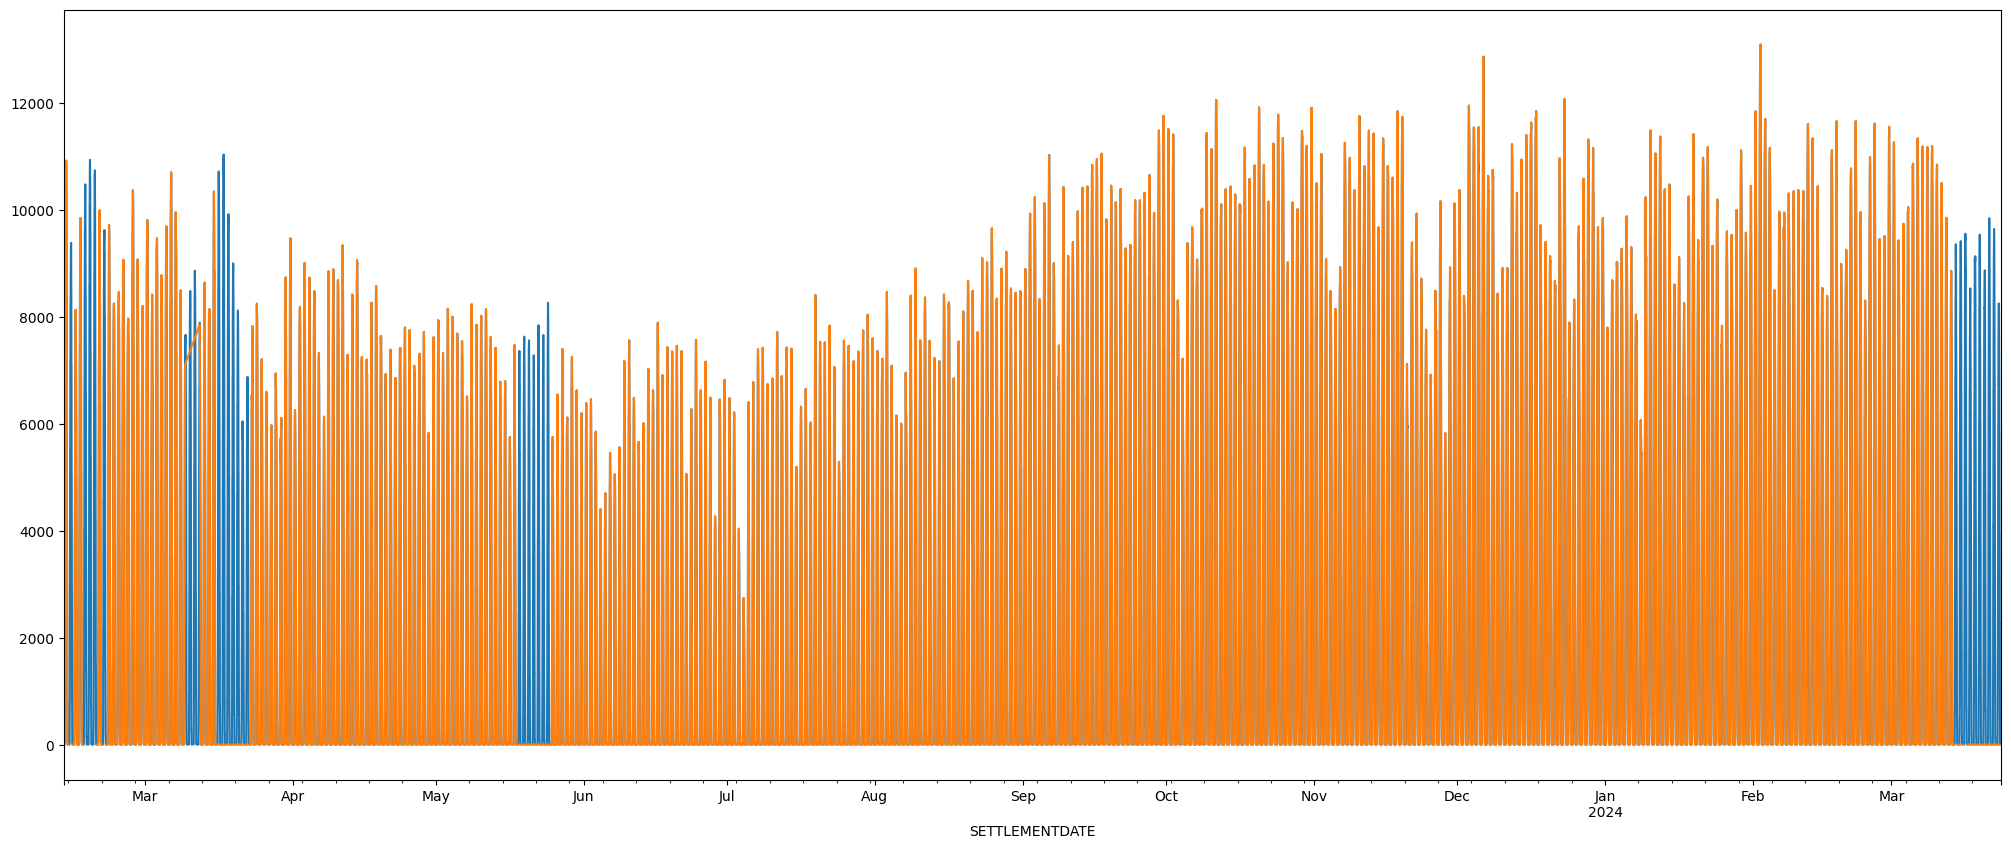

In [367]:
feat_nemosis['ROOFTOP_PV_ACTUAL'].plot(figsize = (25,10))
feat_AUS['Solar (Rooftop)'].plot(figsize = (25,10))

In [22]:
feat_AUS.columns,feat_nemosis.columns

(Index(['Aggregator (VPP)', 'Aggregator (Demand / Response)', 'Network Import',
        'Network Export', 'Interconnector', 'Battery (Charging)',
        'Battery (Discharging)', 'Biomass', 'Coal (Black)', 'Coal (Brown)',
        'Distillate', 'Gas (CCGT)', 'Gas (OCGT)', 'Gas (Reciprocating)',
        'Gas (Steam)', 'Gas (Coal Mine Waste)', 'Hyrdo', 'Pumps',
        'Solar (Utility)', 'Solar (Thermal)', 'Wind', 'Nuclear', 'Biogas',
        'Solar (Rooftop)', 'QI (Solar (Rooftop))', 'METEREDMWFLOW (Trading)',
        'MWFLOW (Trading)', 'MWLOSSES (Trading)'],
       dtype='object'),
 Index(['generation: Battery and Inverter, Descriptor: -',
        'generation: Battery storage, Descriptor: Grid',
        'generation: Battery storage, Descriptor: Wind',
        'generation: Battery, Descriptor: -',
        'generation: Fossil, Descriptor: Black Coal',
        'generation: Fossil, Descriptor: Brown Coal',
        'generation: Fossil, Descriptor: Coal Seam Methane',
        'generation: Fo

In [ ]:
for col in feat_AUS.columns:
    if (feat_AUS[col].max() < 1)  > -0:
        print(col)
        # plt.plot(feat_AUS[col].values)
        # plt.show()

Aggregator (VPP)
Aggregator (Demand / Response)
Network Import
Network Export
Interconnector
Solar (Thermal)
Nuclear
Nemosis: 


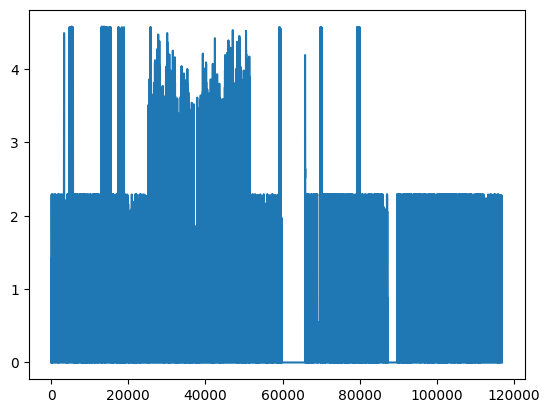

In [189]:
# plt.plot(feat_AUS['Biomass'].values)
# plt.plot(feat_AUS['Biogas'].values)
# plt.show()
plt.plot(feat_nemosis['generation: Solar, Descriptor: solar'].values)

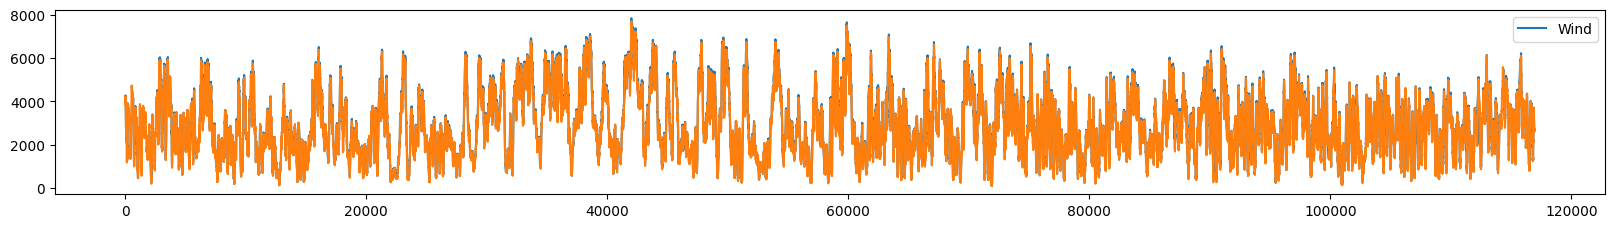

In [368]:
n = -500000
fig = plt.figure(figsize=(20,80))#,constrained_layout=True)
gs = plt.GridSpec(28, 1, figure=fig)
i = 0
ax = fig.add_subplot(gs[i, :])
ax.plot(feat_AUS['Wind'].values[n:], label='Wind')
ax.plot(feat_nemosis['generation: Wind, Descriptor: Wind'].values[n:])
ax.legend()
i += 1

In [323]:
print(feat_AUS['Wind'].shape, feat_nemosis['generation: Wind, Descriptor: Wind'].shape)
feat_AUS['Wind'].isna().sum(), feat_nemosis['generation: Wind, Descriptor: Wind'].isna().sum()


(116928,) (116928,)


(np.int64(1974), np.int64(0))

In [ ]:
dict_AUS_features = {'Biomass': 'generation: Renewable/ Biomass / Waste, Descriptor: Bagasse',
                     'Coal (Black)': 'generation: Fossil, Descriptor: Black Coal',
                     'Coal (Brown)': 'generation: Fossil, Descriptor: Brown Coal',
}       

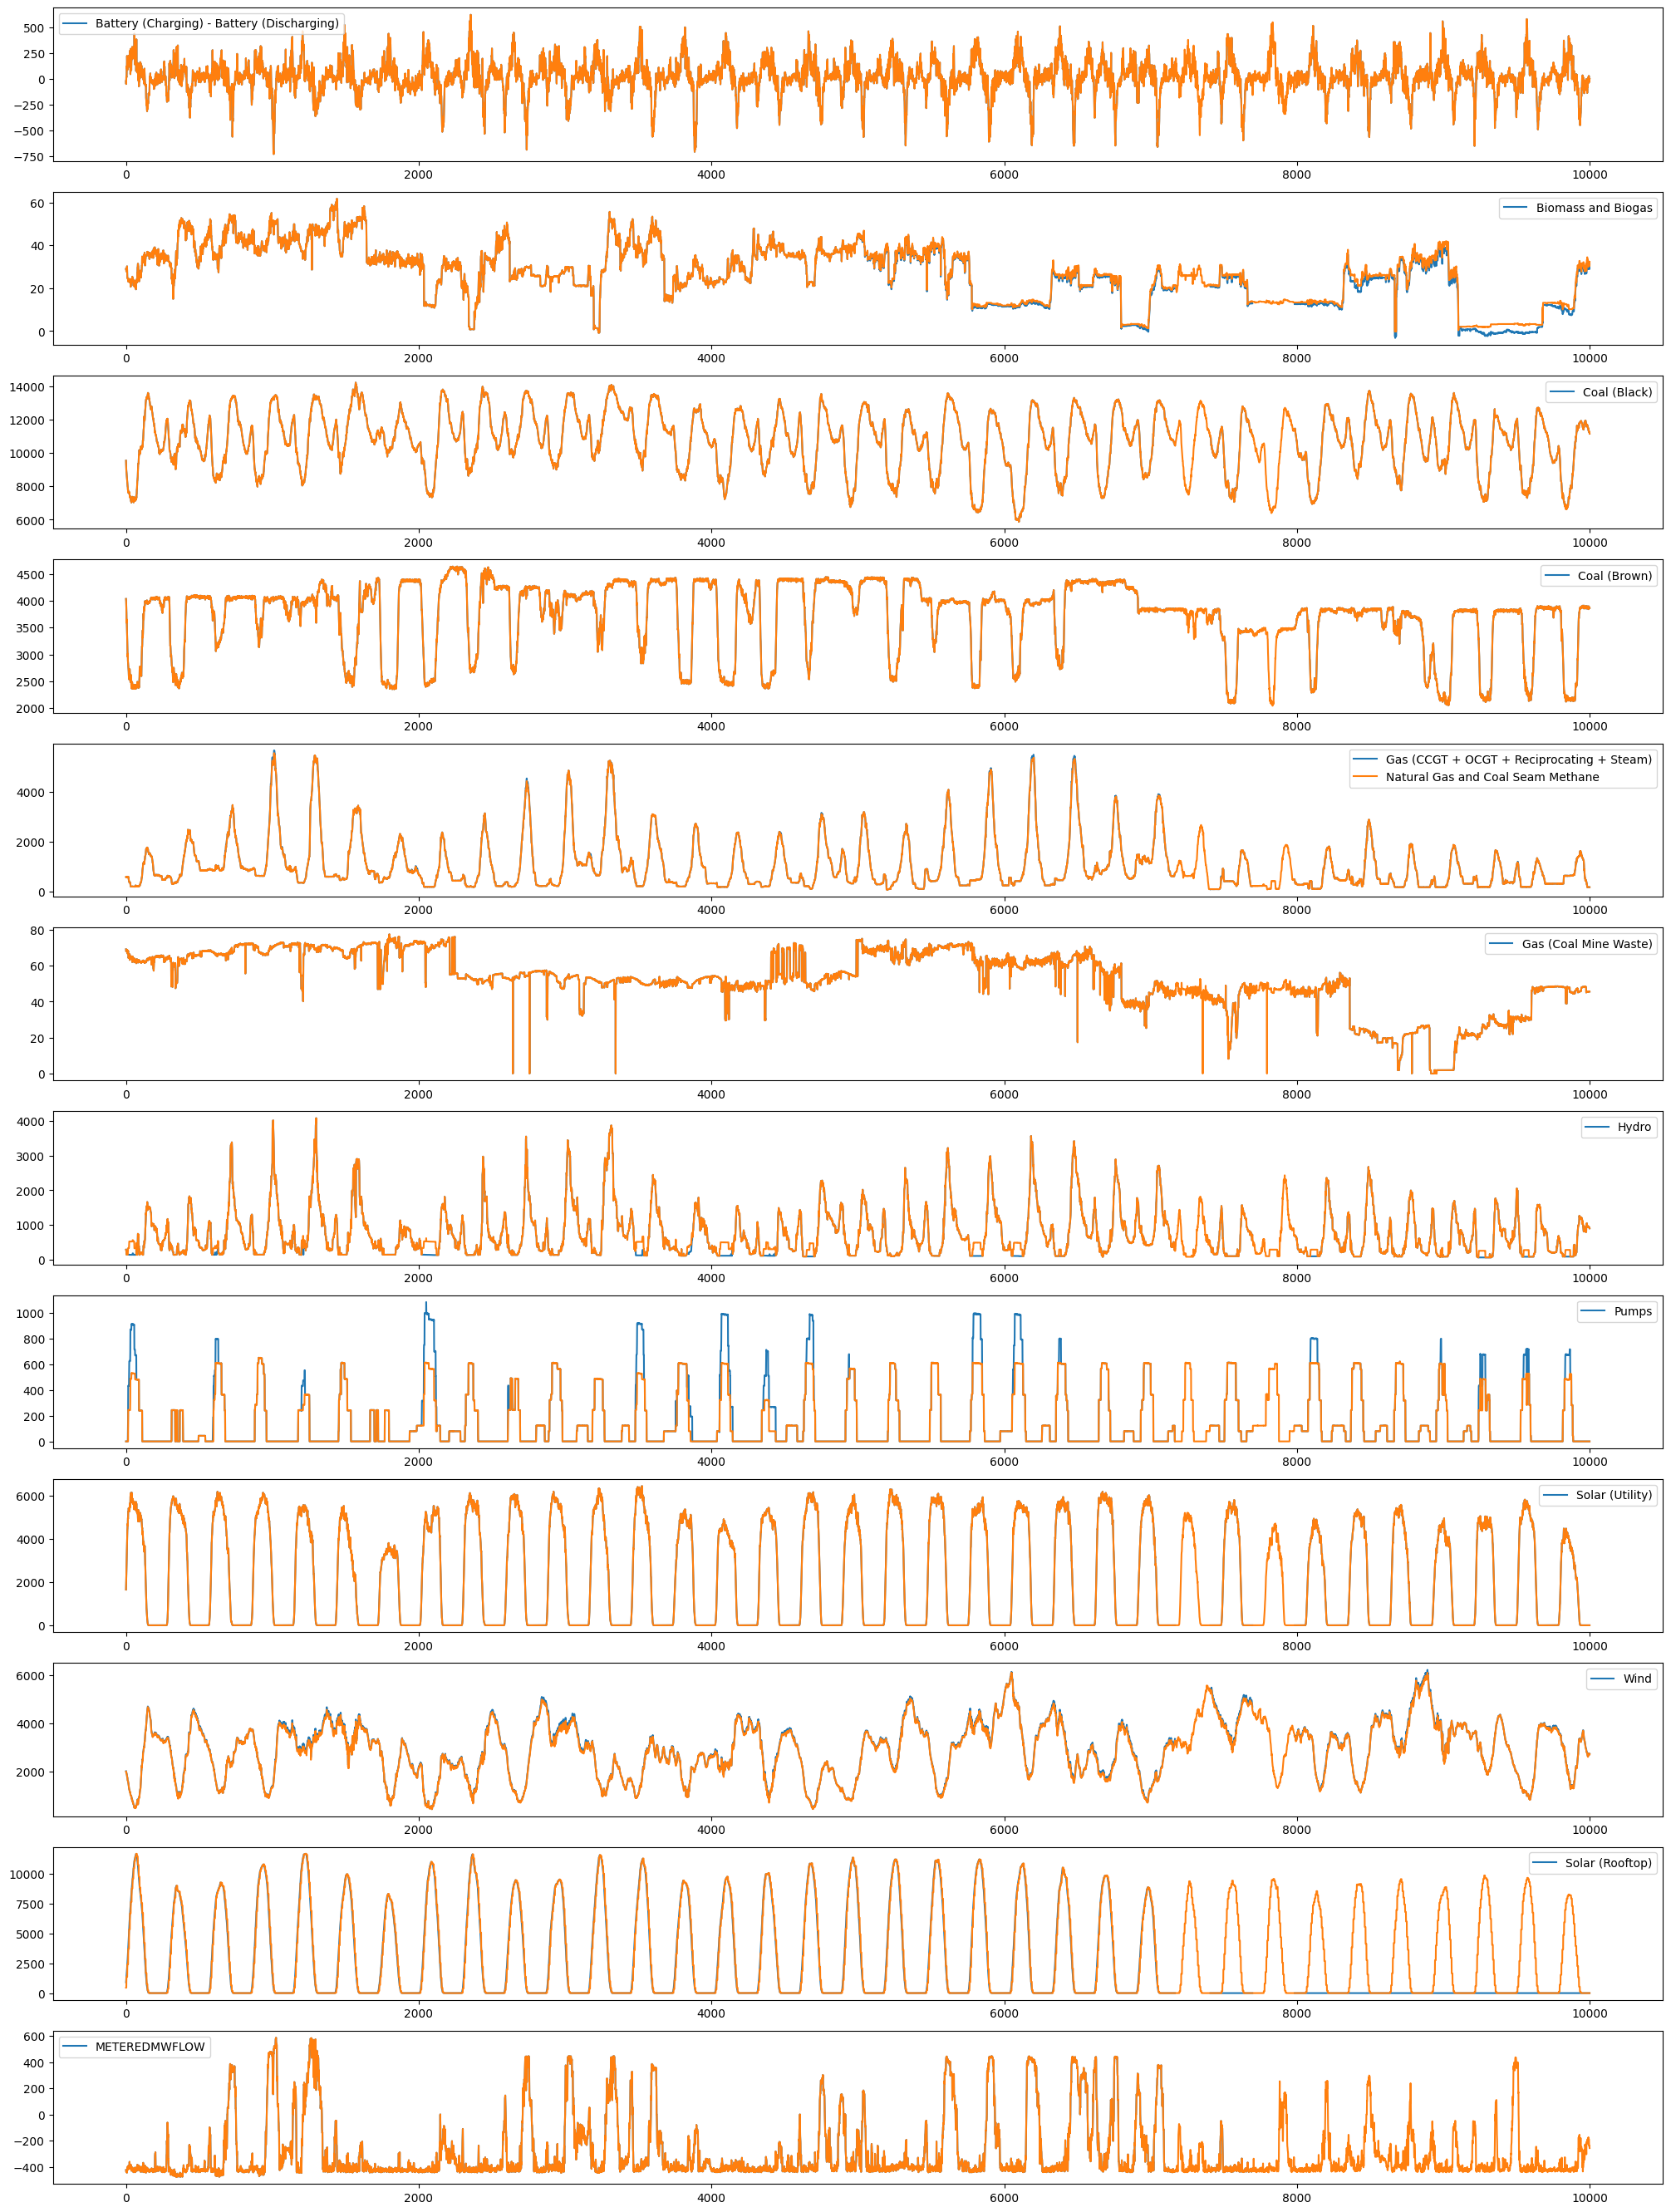

In [328]:
n = -10000
fig = plt.figure(figsize=(25,80))#,constrained_layout=True)
gs = plt.GridSpec(28, 1, figure=fig)
i = 0
ax = fig.add_subplot(gs[0, :])
ax.plot(feat_AUS['Battery (Charging)'].values[n:] - feat_AUS['Battery (Discharging)'].values[n:], label = 'Battery (Charging) - Battery (Discharging)')
ax.plot(feat_nemosis['generation: Battery and Inverter, Descriptor: -'].values[n:] - feat_nemosis['generation: Battery storage, Descriptor: Grid'].values[n:] - feat_nemosis['generation: Battery storage, Descriptor: Wind'].values[n:] + feat_nemosis['generation: Battery, Descriptor: -'].values[n:])
ax.legend()
i+=1
# ax = fig.add_subplot(gs[i, :])
# ax.plot(feat_AUS['Battery (Discharging)'].values[n:])
# ax.plot(feat_nemosis['generation: Battery storage, Descriptor: Grid'].values[n:] + feat_nemosis['generation: Battery storage, Descriptor: Wind'].values[n:])
# ax.legend()
# i += 1
ax = fig.add_subplot(gs[i, :])
ax.plot(feat_AUS['Biomass'].values[n:] + feat_AUS['Biogas'].values[n:], label = 'Biomass and Biogas')
ax.plot(feat_nemosis['generation: Renewable/ Biomass / Waste, Descriptor: Bagasse'].values[n:])
ax.legend()
i += 1
ax = fig.add_subplot(gs[i, :])
ax.plot(feat_AUS['Coal (Black)'].values[n:], label='Coal (Black)')
ax.plot(feat_nemosis['generation: Fossil, Descriptor: Black Coal'].values[n:] )
ax.legend()
i += 1
ax = fig.add_subplot(gs[i, :])
ax.plot(feat_AUS['Coal (Brown)'].values[n:], label='Coal (Brown)')
ax.plot(feat_nemosis['generation: Fossil, Descriptor: Brown Coal'].values[n:])
ax.legend()
i += 1
# ax = fig.add_subplot(gs[i, :])
# ax.plot(feat_AUS['Distillate'].values[n:], label='Distillate')
# # ax.plot(feat_nemosis['generation: Fossil, Descriptor: Natural Gas / Fuel Oil'].values[n:])
# ax.legend()
# i += 1
ax = fig.add_subplot(gs[i, :])
ax.plot(feat_AUS['Gas (CCGT)'].values[n:] + feat_AUS['Gas (OCGT)'].values[n:] + feat_AUS['Gas (Reciprocating)'].values[n:] + 0*feat_AUS['Distillate'].values[n:] + feat_AUS['Gas (Steam)'].values[n:], label='Gas (CCGT + OCGT + Reciprocating + Steam)')
ax.plot(feat_nemosis['generation: Fossil, Descriptor: Natural Gas'].values[n:] + feat_nemosis['generation: Fossil, Descriptor: Coal Seam Methane'].values[n:] + feat_nemosis['generation: Fossil, Descriptor: Natural Gas / Diesel'].values[n:] + feat_nemosis['generation: Fossil, Descriptor: Natural Gas / Fuel Oil'].values[n:] , label = 'Natural Gas and Coal Seam Methane')
# ax.plot(feat_nemosis['generation: Fossil, Descriptor: Natural Gas / Diesel'].values[n:], label = 'Natural Gas/ Diesel')
# ax.plot(feat_nemosis['generation: Fossil, Descriptor: Natural Gas / Fuel Oil'].values[n:], label = 'Natural Gas/ Fuel Oil')
# ax.plot(feat_nemosis['generation: Fossil, Descriptor: Waste Coal Mine Gas'].values[n:], label = 'Waste Coal Mine Gas')
ax.legend()
i += 1
# ax = fig.add_subplot(gs[i, :])
# ax.plot(feat_AUS['Gas (OCGT)'].values[n:], label='Gas (OCGT)')
# ax.plot(feat_nemosis['generation: Fossil, Descriptor: Natural Gas / Diesel'].values[n:] + feat_nemosis['generation: Fossil, Descriptor: Natural Gas / Fuel Oil'].values[n:])
# ax.legend()
# i += 1
# ax = fig.add_subplot(gs[i, :])
# ax.plot(feat_AUS['Gas (Reciprocating)'].values[n:], label='Gas (Reciprocating)')
# ax.plot(feat_nemosis['generation: Fossil, Descriptor: Natural Gas / Diesel'].values[n:])
# ax.legend()
# i += 1
# ax = fig.add_subplot(gs[i, :])
# ax.plot(feat_AUS['Gas (Steam)'].values[n:], label='Gas (Steam)')
# #ax.plot(feat_nemosis['generation: Fossil, Descriptor: Waste Coal Mine Gas'].values[n:])
# ax.legend()
# i += 1
ax = fig.add_subplot(gs[i, :])
ax.plot(feat_AUS['Gas (Coal Mine Waste)'].values[n:], label='Gas (Coal Mine Waste)')
ax.plot(feat_nemosis['generation: Fossil, Descriptor: Waste Coal Mine Gas'].values[n:])
ax.legend()
i += 1
ax = fig.add_subplot(gs[i, :])
ax.plot(feat_AUS['Hyrdo'].values[n:], label='Hydro')
ax.plot(feat_nemosis['generation: Hydro, Descriptor: Water'].values[n:])
# ax.set_xticks(np.arange(0n,,12*24), labels=(np.arange(0n,,12*24)/(12*24)))
ax.legend()
i += 1
ax = fig.add_subplot(gs[i, :])
ax.plot(feat_AUS['Pumps'].values[n:], label='Pumps')
ax.plot(feat_nemosis['generation: pump, Descriptor: -'].values[n:])
ax.legend()
i += 1
ax = fig.add_subplot(gs[i, :])
ax.plot(feat_AUS['Solar (Utility)'].values[n:], label='Solar (Utility)')
ax.plot(feat_nemosis['generation: Solar, Descriptor: Solar'].values[n:])
#ax.set_xticks(np.arange(0n,,12*24), labels=(np.arange(0n,,12*24)/(12*24)))
ax.legend()
i += 1
ax = fig.add_subplot(gs[i, :])
ax.plot(feat_AUS['Wind'].values[n:], label='Wind')
ax.plot(feat_nemosis['generation: Wind, Descriptor: Wind'].values[n:])
ax.legend()
i += 1
# ax = fig.add_subplot(gs[i, :])
# #ax.plot(feat_AUS['Biogas'].values[n:] + feat_AUS['Biomass'].values[n:], label='Biogas')
# ax.plot(feat_nemosis['generation: Renewable/ Biomass / Waste, Descriptor: Bagasse'].values[n:])
# ax.legend()
# i += 1
ax = fig.add_subplot(gs[i, :])
ax.plot(feat_AUS['Solar (Rooftop)'].values[n:], label='Solar (Rooftop)')
ax.plot(feat_nemosis['ROOFTOP_PV_ACTUAL'].values[n:])
#ax.set_xticks(np.arange(0n,,12*24), labels=(np.arange(0n,,12*24)/(12*24)))
ax.legend()
i += 1
ax = fig.add_subplot(gs[i, :])
ax.plot(feat_AUS['METEREDMWFLOW (Trading)'].values[n:], label='METEREDMWFLOW')
ax.plot(feat_nemosis['METEREDMWFLOW'].values[n:])
ax.legend()
i += 1
# ax = fig.add_subplot(gs[i, :])
# ax.plot(feat_AUS['MWFLOW (Trading)'].values[n:], label='MWFLOW')
# ax.plot(feat_nemosis['MWFLOW'].values[n:])
# ax.legend()
# i += 1

plt.show()

# Use the Nemosis data and combine and rename the columns

In [3]:
feat_AUS_nemosis = pd.read_pickle('../data/[feature_data]/AUS/Features_AUS_actual_2021_1_1--2024_7_31.pkl')
feat_AUS_nemosis.index = feat_AUS_nemosis.index.tz_localize('Australia/Queensland')

In [4]:
feat_AUS_nemosis['load']

Datetime
2021-01-01 00:05:00+10:00    18481.63
2021-01-01 00:10:00+10:00    18420.12
2021-01-01 00:15:00+10:00    18314.43
2021-01-01 00:20:00+10:00    18139.51
2021-01-01 00:25:00+10:00    18004.17
                               ...   
2024-07-31 23:35:00+10:00    23115.94
2024-07-31 23:40:00+10:00    23205.27
2024-07-31 23:45:00+10:00    22961.75
2024-07-31 23:50:00+10:00    22794.63
2024-07-31 23:55:00+10:00    22567.28
Name: load, Length: 376703, dtype: float64

In [5]:
feature_data_AUS = pd.DataFrame(index = feat_AUS_nemosis.index,
                                data = {'load': feat_AUS_nemosis['load'],
                                'Battery (Charging) - Discharging)': feat_AUS_nemosis['generation: Battery and Inverter, Descriptor: -'] - feat_AUS_nemosis['generation: Battery storage, Descriptor: Grid'] - feat_AUS_nemosis['generation: Battery storage, Descriptor: Wind'] + feat_AUS_nemosis['generation: Battery, Descriptor: -'],
                                'Biomass and Biogas': feat_AUS_nemosis['generation: Renewable/ Biomass / Waste, Descriptor: Bagasse'],
                                'Coal (Black)': feat_AUS_nemosis['generation: Fossil, Descriptor: Black Coal'],
                                'Coal (Brown)': feat_AUS_nemosis['generation: Fossil, Descriptor: Brown Coal'],
                                'Gas (CCGT + OCGT + Reciprocating + Steam)': feat_AUS_nemosis['generation: Fossil, Descriptor: Natural Gas'] + feat_AUS_nemosis['generation: Fossil, Descriptor: Coal Seam Methane'] + feat_AUS_nemosis['generation: Fossil, Descriptor: Natural Gas / Diesel'] + feat_AUS_nemosis['generation: Fossil, Descriptor: Natural Gas / Fuel Oil'],
                                'Gas (Coal Mine Waste)': feat_AUS_nemosis['generation: Fossil, Descriptor: Waste Coal Mine Gas'],
                                'Hydro': feat_AUS_nemosis['generation: Hydro, Descriptor: Water'],
                                'Pumps': feat_AUS_nemosis['generation: pump, Descriptor: -'],
                                'Solar (Utility)': feat_AUS_nemosis['generation: Solar, Descriptor: Solar'],
                                'Wind': feat_AUS_nemosis['generation: Wind, Descriptor: Wind'],
                                'Solar (Rooftop)': feat_AUS_nemosis['ROOFTOP_PV_ACTUAL'],
                                'Trading (metered MW flow)': feat_AUS_nemosis['METEREDMWFLOW'],
                                })


In [384]:
feature_data_AUS.to_pickle('../data/[feature_data]/AUS/feature_data_AUS.pkl')

In [13]:
feature_data_AUS

,load,Battery (Charging) - Discharging),Biomass and Biogas,Coal (Black),Coal (Brown),Gas (CCGT + OCGT + Reciprocating + Steam),Gas (Coal Mine Waste),Hydro,Pumps,Solar (Utility),Wind,Solar (Rooftop),Trading (metered MW flow)
Datetime,,,,,,,,,,,,,
2021-01-01 00:05:00+10:00,18481.63,-0.25009,-0.400000,10070.30351,3971.95565,931.512360,80.793755,200.10868,0.0,-0.833440,3239.749086,NaN,-283.20001
2021-01-01 00:10:00+10:00,18420.12,11.40033,-0.400000,10098.35714,3971.07724,916.937200,81.081253,326.74191,0.0,-0.833440,3262.030854,NaN,-443.20001
2021-01-01 00:15:00+10:00,18314.43,-20.09975,-0.400000,9988.51056,3973.84937,901.258530,80.537495,409.45535,0.0,-0.833440,3217.322394,NaN,-457.20001
2021-01-01 00:20:00+10:00,18139.51,18.55021,-0.400000,9874.94236,3969.76712,883.206140,80.999992,415.75496,0.0,-0.833440,3231.113439,NaN,-461.50000
2021-01-01 00:25:00+10:00,18004.17,-0.70000,-0.400000,9738.05147,3961.84677,864.021460,81.543739,424.28319,0.0,-0.844320,3221.209011,NaN,-461.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31 23:35:00+10:00,23115.94,10.10890,38.102680,11360.06411,4413.58796,3402.266831,56.123003,1390.74014,0.0,0.071056,2835.679448,0.0,0.00000
2024-07-31 23:40:00+10:00,23205.27,-12.94272,36.642681,11391.87658,4446.16236,3403.143141,54.639747,1407.72130,0.0,0.071056,2849.956973,0.0,-81.80000
2024-07-31 23:45:00+10:00,22961.75,10.47615,36.412679,11351.41001,4414.81646,3337.589771,56.226997,1369.88617,0.0,0.071056,2835.017992,0.0,-67.70000


### different tests

In [333]:
# n = -1#5000
# fig = plt.figure(figsize=(20,80))#,constrained_layout=True)
# gs = plt.GridSpec(28, 1, figure=fig)
# ax = fig.add_subplot(gs[0, :])
# ax.plot(feat_AUS['Wind'].values[:n] - feat_nemosis['generation: Wind, Descriptor: Wind'].values[:(n)], label='Wind')
# # ax.plot(feat_nemosis['generation: Wind, Descriptor: Wind'].values[-(n):-])
# #ax.set_xticks(np.arange(0,n,12*24), labels=(np.arange(0,n,12*24)/(12*24)))
# ax.legend()

# ax = fig.add_subplot(gs[1, :])
# ax.plot(feat_AUS['Solar (Utility)'].values[:n] - feat_nemosis['generation: Solar, Descriptor: Solar'].values[:n], label = 'Solar (Utility)')
# #ax.set_xticks(np.arange(0,n,12*24), labels=(np.arange(0,n,12*24)/(12*24)))
# ax.legend()
# ax = fig.add_subplot(gs[2, :])
# ax.plot(feat_AUS['Solar (Rooftop)'].values[:n] - feat_nemosis['ROOFTOP_PV_ACTUAL'].values[:n], label = 'Solar (Rooftop)')
# #ax.set_xticks(np.arange(0,n,12*24), labels=(np.arange(0,n,12*24)/(12*24)))
# ax.legend()
# ax = fig.add_subplot(gs[3, :])
# ax.plot(feat_AUS['Biomass'].values[:n] - feat_nemosis['generation: Renewable/ Biomass / Waste, Descriptor: Bagasse'].values[:n], label = 'Biomass')
# #ax.set_xticks(np.arange(0,n,12*24), labels=(np.arange(0,n,12*24)/(12*24)))
# ax.legend()
# ax = fig.add_subplot(gs[4, :])
# ax.plot(feat_AUS['Hyrdo'].values[:n] - feat_nemosis['generation: Hydro, Descriptor: Water'].values[:n],label = 'Hydro')
# # ax.set_xticks(np.arange(0,n,12*24), labels=(np.arange(0,n,12*24)/(12*24)))
# ax.legend()
# ax = fig.add_subplot(gs[5, :])
# ax.plot(feat_AUS['Coal (Black)'].values[:n] - feat_nemosis['generation: Fossil, Descriptor: Black Coal'].values[:n], label = 'Coal (Black)')
# ax.set_xticks(np.arange(0,n,12*24), labels=(np.arange(0,n,12*24)/(12*24)))
# ax.legend()
# ax = fig.add_subplot(gs[6, :])
# ax.plot(feat_AUS['Coal (Brown)'].values[:n] - feat_nemosis['generation: Fossil, Descriptor: Brown Coal'].values[:n], label = 'Coal (Brown)')
# ax.legend()
# plt.show()

In [332]:
# feat_nemosis['generation: Wind, Descriptor: Wind'].values[-(n+5*12*24):-5*12*24]

In [331]:
# #plt.plot(feat_AUS['Aggregator (VPP)'].values)
# fig = plt.figure(figsize=(20,80))#,constrained_layout=True)
# gs = plt.GridSpec(28, 1, figure=fig)
# i = 0
# for col in (feat_AUS.columns):
#     if feat_AUS[col].max() < 0.1 and col not in ['Wind','Solar (Utility)','Solar (Rooftop)', 'Biomass', 'Hyrdo']:
#         continue
#     else:
#         ax = fig.add_subplot(gs[i, :])
#         ax.plot(feat_AUS[col].values, label = col)
#         #ax.plot(feat_nemosis[col].values)
#         ax.set_title(col)
#         ax.legend()
#         i+=1